In [2]:
import pandas as pd
import numpy as np

In [3]:
df_train = pd.read_csv('TRAIN - TRAIN.csv.csv')
df_train.head()

,"[('DF', 'PROPN')]"
0,"[('03/01/2001', 'NUM'), ('01:35', 'NUM'), ('PM..."
1,"[('The', 'DET'), ('industry', 'NOUN'), ('has',..."
2,"[('Love', 'VERB'), ('this', 'DET'), ('place', ..."
3,"[('This', 'DET'), ('problem', 'NOUN'), ('of', ..."
4,"[('Esso', 'PROPN'), ('said', 'VERB'), ('0', 'X..."


In [5]:
df_test = pd.read_csv('TEST - TEST.csv.csv')
df_test

,"[('DF', 'PROPN')]"
0,"[('03/01/2001', 'NUM'), ('01:35', 'NUM'), ('PM..."
1,"[('The', 'DET'), ('industry', 'NOUN'), ('has',..."
2,"[('Love', 'VERB'), ('this', 'DET'), ('place', ..."
3,"[('This', 'DET'), ('problem', 'NOUN'), ('of', ..."
4,"[('Esso', 'PROPN'), ('said', 'VERB'), ('0', 'X..."
...,...
65619,"[('Thus', 'ADV'), (',', '.'), ('paradoxically'..."
65620,"[('Someone', 'NOUN'), ('reasonably', 'ADV'), (..."
65621,"[('During', 'ADP'), ('this', 'DET'), ('search'..."
65622,"[('Thank', 'VERB'), ('you', 'PRON'), ('for', '..."


In [6]:
x=df_train.iloc[0,-1]
x

"[('03/01/2001', 'NUM'), ('01:35', 'NUM'), ('PM', 'NOUN')]"

In [7]:
df_train.shape

(52499, 1)

In [8]:
idx =0
idx1=1
vocab2idx ={}
vocab_cnt={}
tag_cnt={}
tag2idx={}
for doc in df_train.iloc[0:-1,0]:
    words = eval(doc)
    for word,tag in words:
        if word not in vocab2idx:
            vocab2idx[str(word)]=idx
            idx+=1
        if word in vocab2idx:
            if word not in vocab_cnt:
                vocab_cnt[str(word)]=1
            else:
                vocab_cnt[str(word)]=vocab_cnt[str(word)]+1

        if tag not in tag2idx:
            tag2idx[tag]=idx1
            idx1+=1
        if tag in tag2idx:
            if tag not in tag_cnt:
                tag_cnt[tag]=1
            else:
                tag_cnt[tag]=tag_cnt[tag]+1
        
   

In [9]:
vocab2idx

{'03/01/2001': 0,
 '01:35': 1,
 'PM': 2,
 'The': 3,
 'industry': 4,
 'has': 5,
 'said': 6,
 '1960': 7,
 'was': 8,
 'a': 9,
 'poor': 10,
 'year': 11,
 '.': 12,
 'Love': 13,
 'this': 14,
 'place': 15,
 '!!': 16,
 'This': 17,
 'problem': 18,
 'of': 19,
 'the': 20,
 'optimum': 21,
 'balance': 22,
 'in': 23,
 'relative': 24,
 'numbers': 25,
 'generalists': 26,
 'and': 27,
 'specialists': 28,
 'can': 29,
 'be': 30,
 'investigated': 31,
 'on': 32,
 'communicative': 33,
 'network': 34,
 'basis': 35,
 'Esso': 36,
 '0': 37,
 'Whiting': 38,
 'field': 39,
 'started': 40,
 'production': 41,
 'Tuesday': 42,
 'He': 43,
 'drew': 44,
 'deep': 45,
 'breath': 46,
 'Glendora': 47,
 "''": 48,
 '--': 49,
 'Each': 50,
 'side': 51,
 'litany': 52,
 'recommendations': 53,
 'for': 54,
 'other': 55,
 'In': 56,
 'symposium': 57,
 'general': 58,
 'exploration': 59,
 'Personal': 60,
 'Perception': 61,
 'Interpersonal': 62,
 'Behavior': 63,
 'discussion': 64,
 'does': 65,
 'not': 66,
 'touch': 67,
 'upon': 68,
 'aspe

In [10]:
len(vocab2idx)

58110

In [11]:
vocab2idx['03/01/2001']

0

In [12]:
len(tag2idx)

21

In [13]:
tag2idx['DET']

3

In [14]:
import matplotlib.pyplot as plt

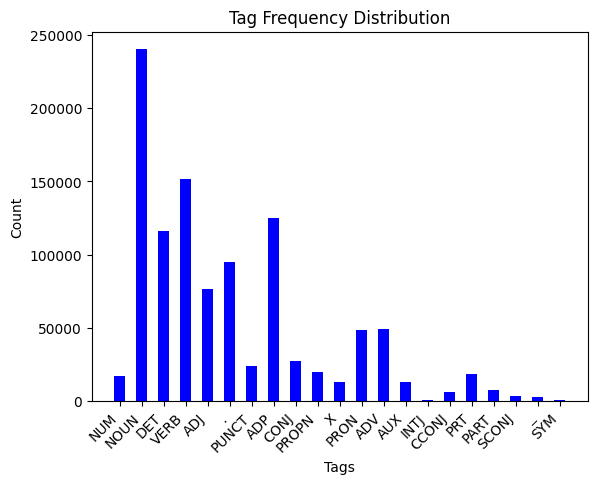

In [15]:
plt.bar(tag_cnt.keys(), tag_cnt.values(), width=0.5, color='b')  
plt.xticks(rotation=45, ha='right') 
plt.xlabel("Tags")
plt.ylabel("Count")
plt.title("Tag Frequency Distribution")
plt.show()

In [175]:
column_name = df_train.columns[0]

train_set = set(df_train[column_name].apply(tuple))
test_set = set(df_test[column_name].apply(tuple))

sim_rows = train_set.intersection(test_set)
sim_cnt = len(sim_rows)
test_rows = len(df_test)
uniq_cnt = test_rows - sim_cnt

s_pcnt = (sim_cnt / test_rows) * 100
u_pcnt = 100 - s_pcnt

df_test_2 = df_test[~df_test[column_name].isin(df_train[column_name])].reset_index(drop=True)



In [176]:
len(df_test_2)

12637

In [199]:
for row in df_test_2:
    print(type(row))

<class 'str'>


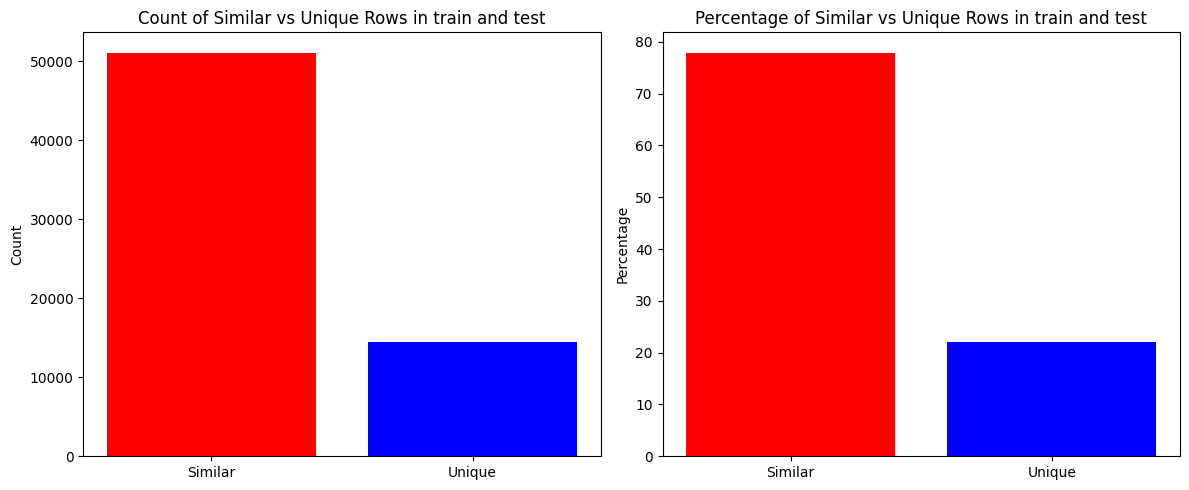

In [177]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(["Similar", "Unique"], [sim_cnt, uniq_cnt], color=["red", "blue"])
axes[0].set_ylabel("Count")
axes[0].set_title("Count of Similar vs Unique Rows in train and test")

axes[1].bar(["Similar", "Unique"], [s_pcnt, u_pcnt], color=["red", "blue"])
axes[1].set_ylabel("Percentage")
axes[1].set_title("Percentage of Similar vs Unique Rows in train and test")

plt.tight_layout()
plt.show()

In [21]:
idx =0
idx1=1
vocab2idxt ={}
tag2idxt={}
for doc in df_test.iloc[0:-1,0]:
    words = eval(doc)
    for word,tag in words:
        if word not in vocab2idx:
            vocab2idxt[str(word)]=idx
            idx+=1
        if tag not in tag2idx:
            tag2idxt[tag]=idx1
            idx1+=1

In [22]:
tag2idxt

{}

In [23]:
len(vocab2idxt)

6612

In [146]:
same_v= len(vocab2idx)
total_v = len(vocab2idx)+len(vocab2idxt)
sm_pcnt = same_v*100/total_v
diff_pcnt= 100 - sm_pcnt

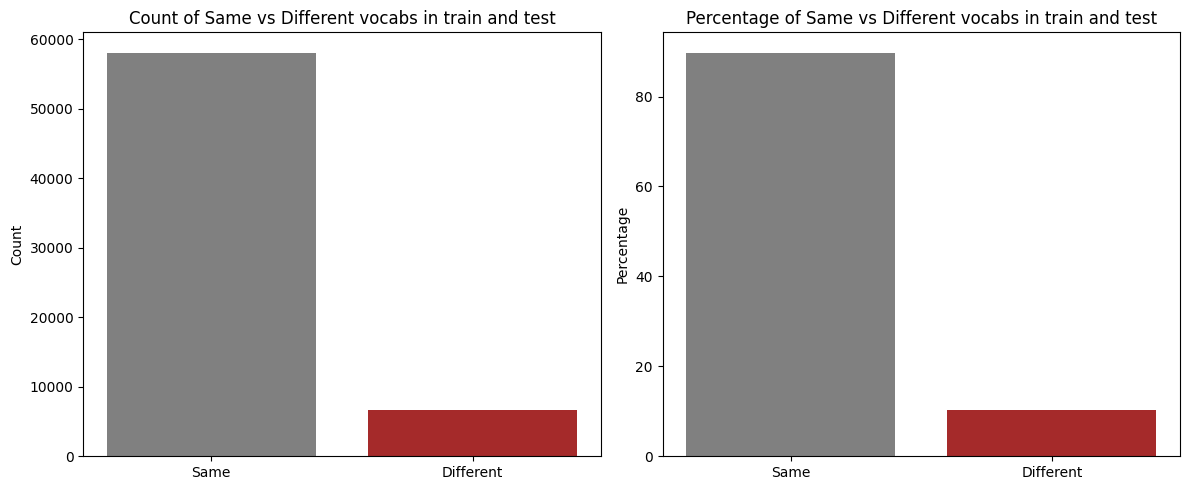

In [150]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(["Same", "Different"], [same_v, len(vocab2idxt)], color=["grey", "brown"])
axes[0].set_ylabel("Count")
axes[0].set_title("Count of Same vs Different vocabs in train and test")

axes[1].bar(["Same", "Different"], [sm_pcnt, diff_pcnt], color=["grey", "brown"])
axes[1].set_ylabel("Percentage")
axes[1].set_title("Percentage of Same vs Different vocabs in train and test")

plt.tight_layout()
plt.show()

In [178]:
df_test_2

,"[('DF', 'PROPN')]"
0,"[('``', '.'), ('E', 'NOUN'), (""''"", '.'), ('st..."
1,"[('He', 'PRON'), ('hoped', 'VERB'), ('they', '..."
2,"[('To', 'PRT'), ('determine', 'VERB'), ('the',..."
3,"[('By', 'ADP'), ('both', 'DET'), ('standards',..."
4,"[('Mr.', 'PROPN'), ('Sonnett', 'PROPN'), ('sai..."
...,...
12632,"[('Thus', 'ADV'), (',', '.'), ('paradoxically'..."
12633,"[('Someone', 'NOUN'), ('reasonably', 'ADV'), (..."
12634,"[('During', 'ADP'), ('this', 'DET'), ('search'..."
12635,"[('Thank', 'VERB'), ('you', 'PRON'), ('for', '..."


In [203]:
filtered_lists = []
for index, row in df_test_2.iterrows():
    words = eval(row[0])
    filtered_words = [(word, tag) for word, tag in words if word in vocab2idx]
    filtered_lists.append(str(filtered_words))

df_test_3 = pd.DataFrame({"filtered_sentences": filtered_lists})



C:\Users\ASUS\AppData\Local\Temp\ipykernel_7920\3896624903.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  words = eval(row[0])


In [204]:
df_test_3

,filtered_sentences
0,"[('``', '.'), ('E', 'NOUN'), (""''"", '.'), ('st..."
1,"[('He', 'PRON'), ('hoped', 'VERB'), ('they', '..."
2,"[('To', 'PRT'), ('determine', 'VERB'), ('the',..."
3,"[('By', 'ADP'), ('both', 'DET'), ('standards',..."
4,"[('Mr.', 'PROPN'), ('Sonnett', 'PROPN'), ('sai..."
...,...
12632,"[('Thus', 'ADV'), (',', '.'), ('paradoxically'..."
12633,"[('Someone', 'NOUN'), ('reasonably', 'ADV'), (..."
12634,"[('During', 'ADP'), ('this', 'DET'), ('search'..."
12635,"[('Thank', 'VERB'), ('you', 'PRON'), ('for', '..."


In [207]:
for row in df_test_3:
    print(type(row))

<class 'str'>


In [208]:
em=np.zeros((len(vocab2idx),len(tag2idx)+1)) 

In [210]:
tag2idx

{'NUM': 1,
 'NOUN': 2,
 'DET': 3,
 'VERB': 4,
 'ADJ': 5,
 '.': 6,
 'PUNCT': 7,
 'ADP': 8,
 'CONJ': 9,
 'PROPN': 10,
 'X': 11,
 'PRON': 12,
 'ADV': 13,
 'AUX': 14,
 'INTJ': 15,
 'CCONJ': 16,
 'PRT': 17,
 'PART': 18,
 'SCONJ': 19,
 '_': 20,
 'SYM': 21}

In [211]:
idx2vocab = {i:v for v,i in vocab2idx.items()}
idx2tag = {id:t for t,id in tag2idx.items()}


In [212]:
idx2vocab[3]

'The'

In [213]:
tm= np.zeros((len(tag2idx)+1,len(tag2idx)+1)) #+1 where 0 is start
tm

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [214]:
tm.shape

(22, 22)

In [215]:
#now i want to find out how many times the row item appeared before the column item
for row in df_train.iloc[0:-1,0]:
    rowl = eval(row)
    for j in range(len(rowl)):
        if j!=0:
            _,tag1=rowl[j]
            _,tag2= rowl[j-1]
            t= tag2idx[tag1]
            tb= tag2idx[tag2]
            tm[tb,t]+=1
        if j==0:
            _,tag3=rowl[j]
            ts= tag2idx[tag3]
            tm[0,ts]+=1

In [217]:
row_sums = np.sum(tm, axis=1, keepdims=True) 

In [219]:
row_sums[row_sums == 0] = 1

In [220]:
tm_p = tm/row_sums

In [221]:
tm_p

array([[0.00000000e+00, 2.26865785e-02, 1.23985676e-01, 1.98979009e-01,
        4.92018744e-02, 4.16206332e-02, 4.42112080e-02, 9.69560745e-03,
        1.12461427e-01, 3.70109337e-02, 4.11444245e-02, 5.96213189e-03,
        1.61377576e-01, 8.52603909e-02, 6.53358223e-03, 8.53365843e-03,
        5.40972989e-03, 2.36580441e-02, 1.33338413e-03, 8.66699684e-03,
        1.05527830e-02, 1.71435102e-03],
       [0.00000000e+00, 5.37976548e-02, 3.63679217e-01, 1.06063284e-02,
        3.56490484e-02, 5.03211361e-02, 1.86023216e-01, 6.58181604e-02,
        1.08891639e-01, 2.65747452e-02, 1.11955689e-02, 3.83006305e-02,
        7.54227800e-03, 1.50256320e-02, 2.53373402e-03, 1.17848094e-04,
        6.59949325e-03, 3.83006305e-03, 3.53544281e-03, 8.24936657e-04,
        6.48164516e-04, 8.48506275e-03],
       [0.00000000e+00, 8.44245853e-03, 1.51436600e-01, 1.46402952e-02,
        1.41695946e-01, 1.30489587e-02, 2.23871722e-01, 4.18521481e-02,
        2.45308698e-01, 5.04495525e-02, 1.58714870e-03

In [222]:
tm_p[0,20]

0.010552782963160501

In [223]:
em.shape

(58110, 22)

In [224]:
#now i want to find out how many times the row item appeared as the column item
for row in df_train.iloc[0:-1,0]:
    rowl = eval(row)
    for j in range(len(rowl)):
        word,tag=rowl[j]
        tid= tag2idx[tag]
        wid= vocab2idx[word]
        em[wid,tid]+=1

In [225]:
print(f"{vocab2idx['The']},{tag2idx['DET']}")

3,3


In [226]:
em[3][3]

6473.0

In [227]:
col_sums = np.sum(em, axis=0, keepdims=True) 
col_sums[col_sums== 0] = 1
em_p = em/col_sums

In [228]:
em_p

array([[0.00000000e+00, 5.83158386e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.83158386e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.66278102e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.16319734e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [229]:
print(f"{em_p[3][3]},{idx2tag[3]},{idx2vocab[3]}")
print(f"{em_p[4][2]},{idx2tag[2]},{idx2vocab[4]}")
print(f"{em_p[3][2]},{idx2tag[2]},{idx2vocab[3]}")


0.05590485896395073,DET,The
0.0007160699417152373,NOUN,industry
0.0,NOUN,The


In [230]:
sums = np.sum(em_p, axis=0, keepdims=True) 
print(sums)
#I have kept 0 as placeholder only, so no tags there

[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [231]:
sums2 = np.sum(tm_p, axis=1, keepdims=True) 
sums2

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [50]:
sums2[6][0]

1.0

In [51]:
sums2.shape

(22, 1)

In [53]:
def viterbi1(row, tm_p, em_p, vocab2idx):
    rowl = eval(row)
    n = len(rowl)
    dp = np.full((len(tag2idx), n), -np.inf)
    bck_ptr = np.zeros((len(tag2idx), n), dtype=int)
    first_word, first_tag = rowl[0]
    dp[:, 0] = tm_p[0, 1:]*em_p[vocab2idx[first_word], 1:]
    for i in range(1, n):
        for tag in range(1, len(tag2idx) + 1):
            prev_pb = dp[:, i - 1]*tm_p[1:, tag]*em_p[vocab2idx[rowl[i][0]], tag]
            dp[tag - 1, i] = np.max(prev_pb)
            bck_ptr[tag - 1, i] = np.argmax(prev_pb)
    last_tag = np.argmax(dp[:, -1]) 
    tags = [last_tag]
    
    for j in range(n - 1, 0, -1):
        tags.insert(0, bck_ptr[tags[0]-1, j]+1)  

    return tags

In [54]:
def viterbi2(row, tm_p, em_p, vocab2idx):
    rowl = eval(row)
    n = len(rowl)
    dp = np.full((len(tag2idx), n), -np.inf)
    bck_ptr = np.zeros((len(tag2idx), n), dtype=int)
    first_word,_= rowl[0]
    dp[:, 0] = np.log(tm_p[0, 1:]+ 1e-40) + np.log(em_p[vocab2idx[first_word], 1:]+ 1e-40)
    
    for i in range(1, n):
        for tag in range(1, len(tag2idx) + 1):
            prev_pb = dp[:, i - 1] + np.log(tm_p[1:, tag]+ 1e-40) + np.log(em_p[vocab2idx[rowl[i][0]], tag]+ 1e-40)
            dp[tag - 1, i] = np.max(prev_pb)
            bck_ptr[tag - 1, i] = np.argmax(prev_pb)
    last_tag = np.argmax(dp[:, -1]) 
    tags = [last_tag]
    
    for j in range(n - 1, 0, -1):
        tags.insert(0, bck_ptr[tags[0]-1, j]+1)  

    return tags


In [91]:
row=df_test.iloc[546,0]
row

"[('are', 'AUX'), ('you', 'PRON'), ('lying', 'VERB'), ('?', 'PUNCT')]"

In [92]:
tgs=viterbi1(row,tm_p,em_p,vocab2idx)
tgs

[1, 1, 1, 5]

In [93]:
for t in tgs:
    print(idx2tag[t])

NUM
NUM
NUM
ADJ


In [94]:
tgs=viterbi2(row,tm_p,em_p,vocab2idx)
print(tgs)
for t in tgs:
    print(idx2tag[t])

[4, 12, 4, 5]
VERB
PRON
VERB
ADJ


In [188]:
train_scores=[]
grd_cm=[]
pred_cm=[]
for row in df_train.iloc[0:-1,0]:
    rowl= eval(row)
    grd_t=[]
    for _,tg in rowl:
        grd_t.append(tg)
    grd_cm.extend(grd_t)
    idxs = viterbi2(row,tm_p,em_p,vocab2idx)
    pred_t = [idx2tag.get(i, "UNKNOWN") for i in idxs]
    sums=0
    for i in range(len(grd_t)):
        if(grd_t[i]==pred_t[i]): sums+=1
    score= sums/len(grd_t)
    pred_cm.extend(pred_t)
    train_scores.append(score)


In [189]:
train_scores[0:10]

[0.6666666666666666,
 0.9,
 0.75,
 0.9565217391304348,
 0.7,
 0.8333333333333334,
 0.6666666666666666,
 0.9090909090909091,
 0.9090909090909091,
 0.8]

In [190]:
type(train_scores)

list

In [191]:
average_score= sum(train_scores)/len(train_scores)
average_score

0.8076053374197312

In [192]:
print(f"{len(grd_cm)},{len(pred_cm)}")

1056968,1056968


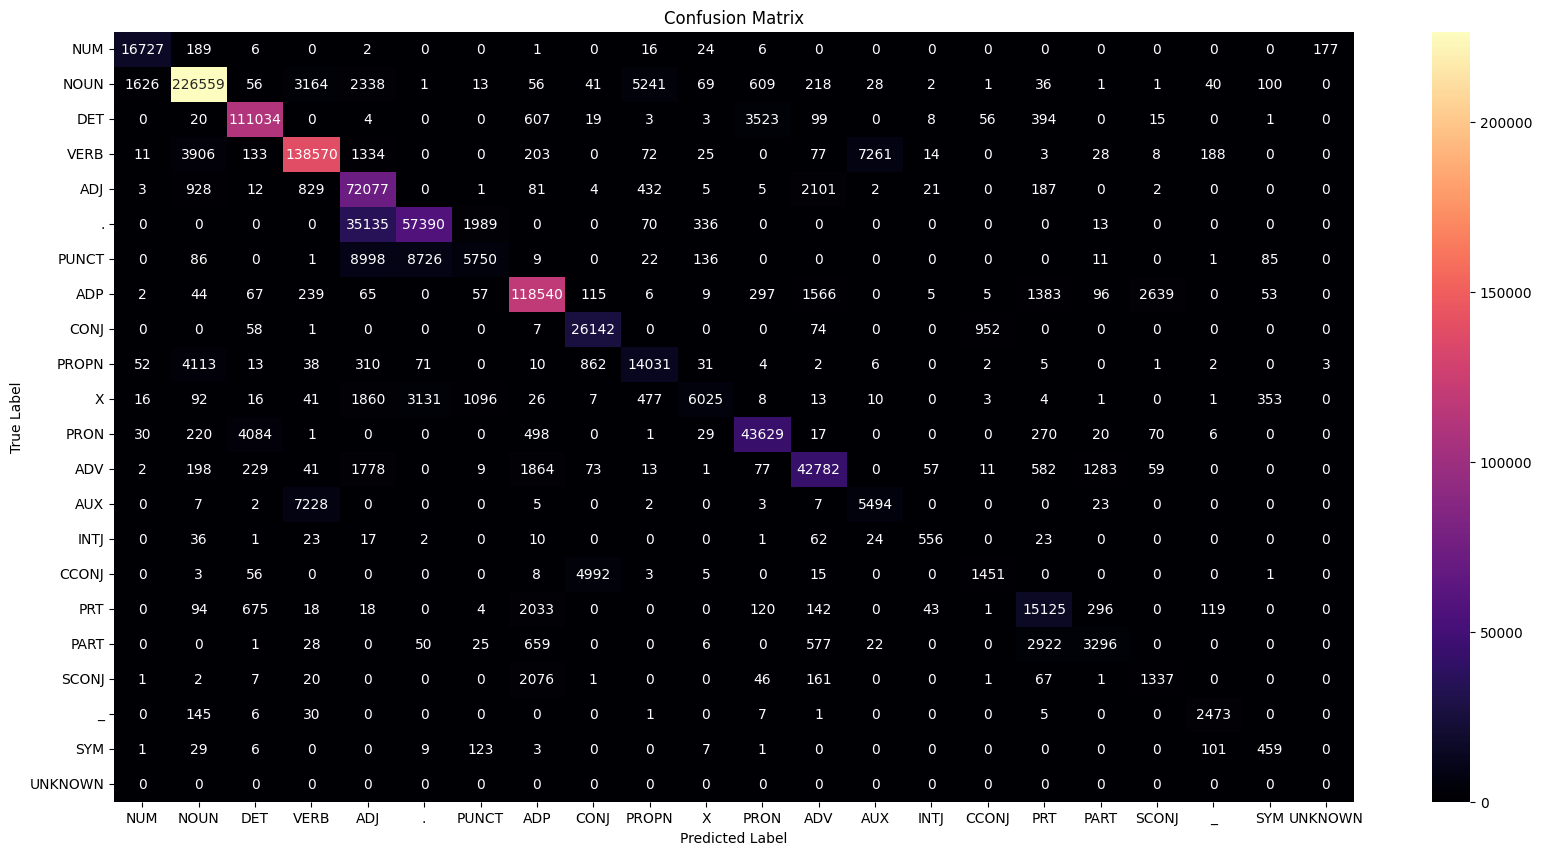

In [194]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

labels= list(tag2idx.keys())+['UNKNOWN']
cm = confusion_matrix(grd_cm, pred_cm, labels=labels)

plt.figure(figsize=(20, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="magma", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [253]:
test_scores=[]
grd_cm_t=[]
pred_cm_t=[]
for row in df_test_3.iloc[0:-1,0]:
    try:
        rowl = eval(row)  
        if not isinstance(rowl, list) or len(rowl) == 0:
            continue 
    except:
        continue 
    grd_t=[]
    for _,tg in rowl:
        grd_t.append(tg)
    grd_cm_t.extend(grd_t)
    idxs = viterbi2(row,tm_p,em_p,vocab2idx)
    pred_t = [idx2tag.get(i, "UNKNOWN") for i in idxs]
    sums=0
    for i in range(len(grd_t)):
        if(grd_t[i]==pred_t[i]): sums+=1
    score= sums/len(grd_t)
    pred_cm_t.extend(pred_t)
    test_scores.append(score)


In [259]:
average_test_score= sum(test_scores)/len(test_scores)
average_test_score


0.8087287002245158

In [260]:
print(f"{len(grd_cm_t)},{len(pred_cm_t)}")

252025,252025


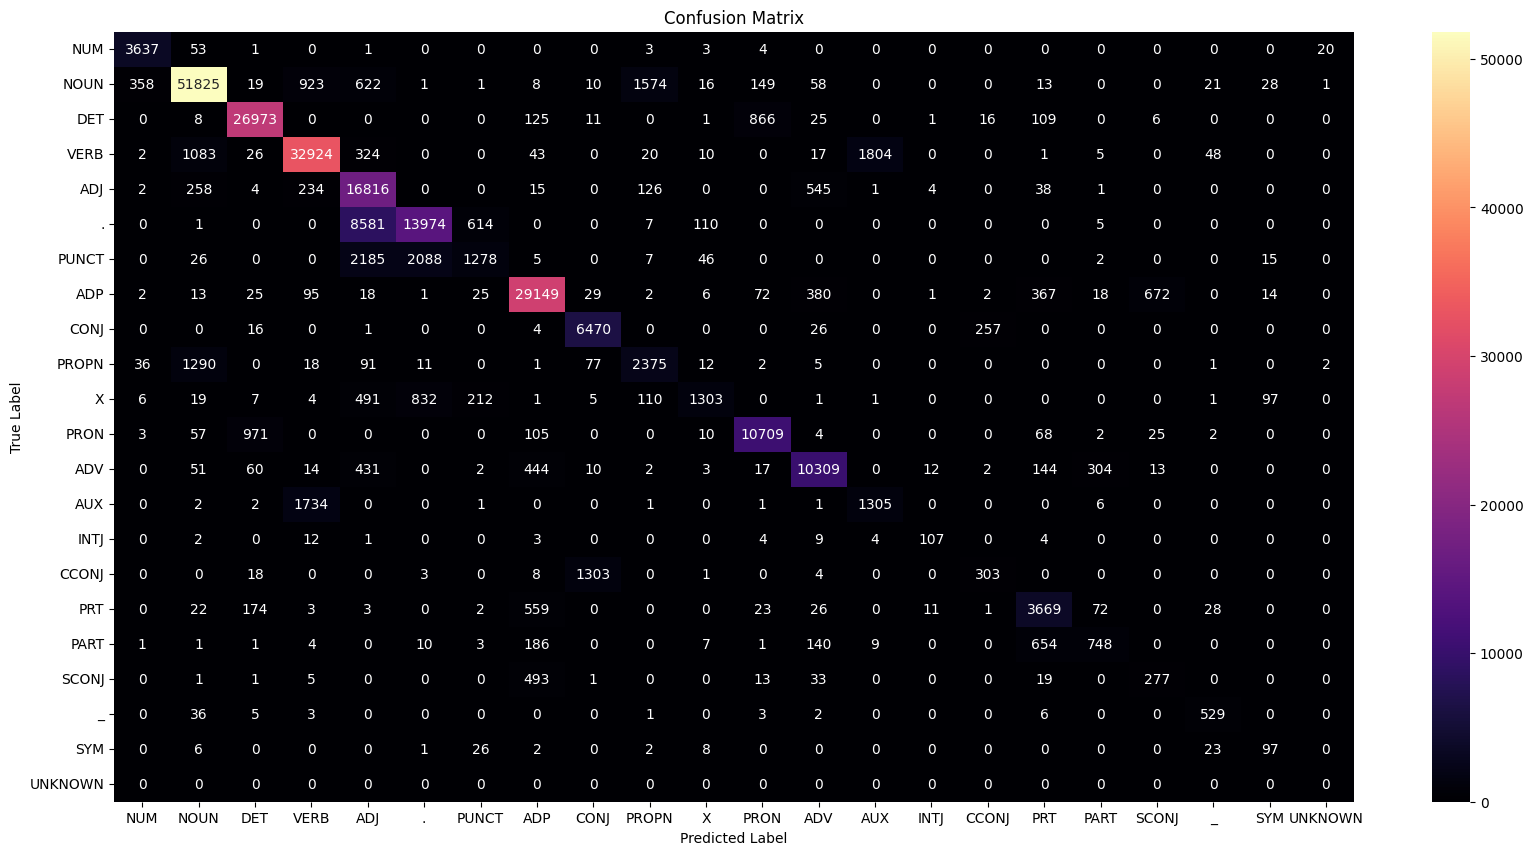

In [261]:
cm_test = confusion_matrix(grd_cm_t, pred_cm_t, labels=labels)

plt.figure(figsize=(20, 10))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="magma", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()